In [29]:
import os
from PIL import Image

dataset_path = "APPLE RIPENESS LEVELS IMAGE DATASET"

for root, dirs, files in os.walk(dataset_path):
    for file in files:
        file_path = os.path.join(root, file)
        try:
            img = Image.open(file_path)
            img.verify()  # Just checks if image is valid, doesn't modify
        except Exception as e:
            print(f"⚠️ Issue with: {file_path} - {e}")  # This will tell you which images are problematic


In [30]:
for root, dirs, files in os.walk(dataset_path):
    for file in files:
        file_path = os.path.join(root, file)
        try:
            img = Image.open(file_path).convert("RGB")  # Convert to RGB mode
            new_path = file_path.rsplit(".", 1)[0] + ".jpg"  # Keep same name, just change format
            img.save(new_path, "JPEG")
            print(f"✅ Converted: {file_path} -> {new_path}")
        except Exception as e:
            print(f"⚠️ Skipping: {file_path} - {e}")  # No deletion!


✅ Converted: APPLE RIPENESS LEVELS IMAGE DATASET\100%\citra1.jpeg -> APPLE RIPENESS LEVELS IMAGE DATASET\100%\citra1.jpg
✅ Converted: APPLE RIPENESS LEVELS IMAGE DATASET\100%\citra1.jpg -> APPLE RIPENESS LEVELS IMAGE DATASET\100%\citra1.jpg
✅ Converted: APPLE RIPENESS LEVELS IMAGE DATASET\100%\citra10.jpg -> APPLE RIPENESS LEVELS IMAGE DATASET\100%\citra10.jpg
✅ Converted: APPLE RIPENESS LEVELS IMAGE DATASET\100%\citra100.jpg -> APPLE RIPENESS LEVELS IMAGE DATASET\100%\citra100.jpg
✅ Converted: APPLE RIPENESS LEVELS IMAGE DATASET\100%\citra11.jpg -> APPLE RIPENESS LEVELS IMAGE DATASET\100%\citra11.jpg
✅ Converted: APPLE RIPENESS LEVELS IMAGE DATASET\100%\citra12.jpg -> APPLE RIPENESS LEVELS IMAGE DATASET\100%\citra12.jpg
✅ Converted: APPLE RIPENESS LEVELS IMAGE DATASET\100%\citra13.jpg -> APPLE RIPENESS LEVELS IMAGE DATASET\100%\citra13.jpg
✅ Converted: APPLE RIPENESS LEVELS IMAGE DATASET\100%\citra14.jpg -> APPLE RIPENESS LEVELS IMAGE DATASET\100%\citra14.jpg
✅ Converted: APPLE RIPENE

In [44]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout
from tensorflow.keras.regularizers import l2
from tensorflow.keras.callbacks import EarlyStopping

# 🔹 Define dataset paths
DATASET_PATH = "APPLE RIPENESS LEVELS IMAGE DATASET"  # Update with your dataset directory
BATCH_SIZE = 32
IMG_SIZE = (224, 224)

# 🔹 Data Augmentation
train_datagen = ImageDataGenerator(
    rescale=1.0/255,
    rotation_range=20,  # Random rotation
    width_shift_range=0.2,  # Horizontal shift
    height_shift_range=0.2,  # Vertical shift
    shear_range=0.2,  # Shearing transformation
    zoom_range=0.2,  # Random zoom
    horizontal_flip=True,  # Flip images horizontally
    fill_mode="nearest",
    validation_split=0.2  # Split validation data
)

# 🔹 Load dataset with augmentation
train_data = train_datagen.flow_from_directory(
    DATASET_PATH,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode="sparse",
    subset="training"
)

val_data = train_datagen.flow_from_directory(
    DATASET_PATH,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode="sparse",
    subset="validation"
)

# 🔹 Define MobileNetV2 Model
base_model = MobileNetV2(weights="imagenet", include_top=False, input_shape=(224, 224, 3))
base_model.trainable = False  # Freeze the pre-trained layers

# 🔹 Add custom layers with dropout & L2 regularization
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(128, activation="relu", kernel_regularizer=l2(0.01))(x)  # L2 Regularization
x = Dropout(0.3)(x)  # Dropout layer
x = Dense(3, activation="softmax")(x)  # 3 categories: 60%, 80%, 100%

# 🔹 Create final model
model = Model(inputs=base_model.input, outputs=x)

# 🔹 Compile model with reduced learning rate
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0005),
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

# 🔹 Early Stopping (Prevents Overfitting)
early_stop = EarlyStopping(monitor="val_loss", patience=5, restore_best_weights=True)

# 🔹 Train model
history = model.fit(train_data, validation_data=val_data, epochs=30, callbacks=[early_stop])

# 🔹 Save model
model.save("apple_ripeness_model.keras")



Found 253 images belonging to 3 classes.


Found 63 images belonging to 3 classes.


C:\Users\maria\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 9s 715ms/step - accuracy: 0.4076 - loss: 3.4338 - val_accuracy: 0.7302 - val_loss: 2.8159
Epoch 2/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 4s 472ms/step - accuracy: 0.8412 - loss: 2.6170 - val_accuracy: 0.8730 - val_loss: 2.3943
Epoch 3/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 4s 477ms/step - accuracy: 0.8753 - loss: 2.3790 - val_accuracy: 0.9206 - val_loss: 2.2595
Epoch 4/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 4s 459ms/step - accuracy: 0.9233 - loss: 2.1998 - val_accuracy: 0.9048 - val_loss: 2.1445
Epoch 5/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 4s 473ms/step - accuracy: 0.9428 - loss: 2.0628 - val_accuracy: 0.9524 - val_loss: 1.9742
Epoch 6/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 4s 473ms/step - accuracy: 0.9468 - loss: 1.9239 - val_accuracy: 0.9365 - val_loss: 1.8941
Epoch 7/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 4s 470ms/step - accuracy: 0.9663 - loss: 1.7822 - val_accuracy: 0.9524 - val_loss: 1.7499
Epoch 8/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 4s 474ms/step - accuracy: 0.9871 - loss: 1.6706 - val_accuracy: 1.0000 - val_loss:

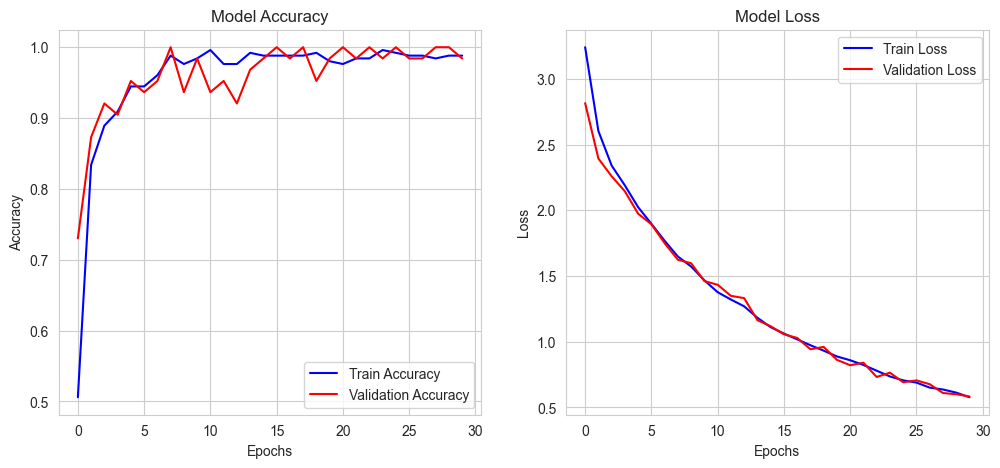

In [45]:
# 🔹 Plot accuracy and loss
sns.set_style("whitegrid")
plt.figure(figsize=(12, 5))

# Accuracy plot
plt.subplot(1, 2, 1)
plt.plot(history.history["accuracy"], label="Train Accuracy", color="blue")
plt.plot(history.history["val_accuracy"], label="Validation Accuracy", color="red")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.title("Model Accuracy")

# Loss plot
plt.subplot(1, 2, 2)
plt.plot(history.history["loss"], label="Train Loss", color="blue")
plt.plot(history.history["val_loss"], label="Validation Loss", color="red")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.title("Model Loss")

plt.show()

In [ ]:


# 🔹 Function to Predict Ripeness
def predict_ripeness(img_path):
    img = image.load_img(img_path, target_size=IMG_SIZE)
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension
    img_array /= 255.0  # Normalize

    # Predict
    predictions = model.predict(img_array)
    class_labels = ["60% Ripeness", "80% Ripeness", "100% Ripeness"]
    predicted_class = class_labels[np.argmax(predictions)]

    print(f"Predicted Ripeness Level: {predicted_class}")

# 🔹 Test a sample image
predict_ripeness("path_to_test_image.jpg")  # Change this to your test image


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 128ms/step
Predicted Ripeness Level: 66% Ripeness
